In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Trx_Rank --> The number of transactions of this user with this merchant
Points --> The Number of points redeemed in this transaction
Trx_Vlu--> the equivalent values in pounds to the redeemed points
Trx_Age--> How many days this transaction was done
Customer_Age--> the number of days from which the user made his last transaction ever
Category In English --> The category of the merchant
https://www.kaggle.com/code/younaniskander/rfm-and-clustering/input

In [2]:
data_raw = pd.read_csv('Cleaned_Data_Merchant_Name.csv')
data_raw.head(4)

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
0         1   20140   2014.0      362           362             Fashion   
1         1   11200   1120.0      371           368             Fashion   
2         2    8500    850.0      368           368             Fashion   
3         1    1980    198.0      558            34             Fashion   

   User_Id         Mer_Name  
0    21053  Shankar Traders  
1    26472  Shankar Traders  
2    26472  Shankar Traders  
3    27075  Shankar Traders

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trx_Rank             43672 non-null  int64  
 1   Points               43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Customer_Age         43672 non-null  int64  
 5   Category In English  43672 non-null  object 
 6   User_Id              43672 non-null  int64  
 7   Mer_Name             43672 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 2.7+ MB


In [4]:
data_raw.duplicated().sum()

0

In [5]:
data_raw.isnull().sum()

Trx_Rank               0
Points                 0
Trx_Vlu                0
Trx_Age                0
Customer_Age           0
Category In English    0
User_Id                0
Mer_Name               0
dtype: int64

In [6]:
data_raw.columns

Index(['Trx_Rank', 'Points', 'Trx_Vlu', 'Trx_Age', 'Customer_Age',
       'Category In English', 'User_Id', 'Mer_Name'],
      dtype='object')

In [7]:
data_raw.describe()

Trx_Rank         Points       Trx_Vlu       Trx_Age  Customer_Age  \
count  43672.000000   43672.000000  43672.000000  43672.000000  43672.000000   
mean       1.265227    3312.249748    331.224975    185.186664    144.027844   
std        0.776549    5756.374137    575.637414    121.989540    114.764448   
min        1.000000      20.000000      2.000000      1.000000      1.000000   
25%        1.000000    1220.000000    122.000000     62.000000     34.000000   
50%        1.000000    1893.500000    189.350000    203.000000    115.000000   
75%        1.000000    3100.000000    310.000000    271.000000    252.000000   
max       17.000000  263800.000000  26380.000000    698.000000    682.000000   

            User_Id  
count  43672.000000  
mean   17173.411889  
std     9665.399084  
min        0.000000  
25%     8710.750000  
50%    17561.000000  
75%    25634.250000  
max    33518.000000

In [8]:
num_col = ['Points','Trx_Vlu','Trx_Age','Customer_Age']

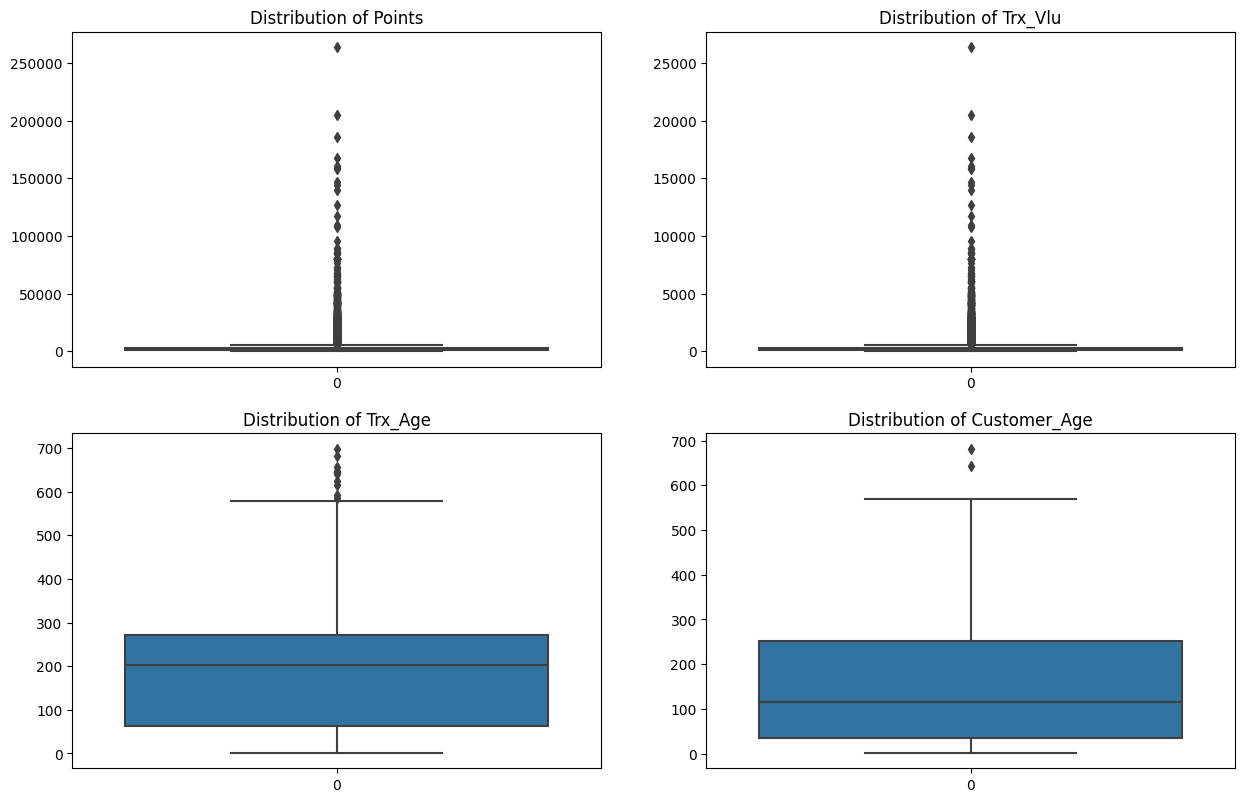

In [9]:
plt.figure(figsize = (15 , 20))
for i , feature in enumerate(num_col,1):
    plt.subplot(len(num_col),2,i)
    plt.title(f"Distribution of {feature}")
    sns.boxplot(data_raw[feature])

In [10]:
# Detect outliers using IQR method
def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 -q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

In [11]:
outliers_count = {}
for column , outliers in zip(num_col ,detect_outliers(data_raw[num_col])):
    outliers = detect_outliers(data_raw[column])
    outliers_count[column]=len(outliers)
    print(f"Outliers in {column}:")
    print(outliers)
    print(f"number of outliers: {len(outliers)}")
    print('-'*50)

Outliers in Points:
0        20140
1        11200
2         8500
5        16740
10        9491
         ...  
43591     6225
43626    21320
43642    11040
43643     6940
43666     6500
Name: Points, Length: 4644, dtype: int64
number of outliers: 4644
--------------------------------------------------
Outliers in Trx_Vlu:
0        2014.0
1        1120.0
2         850.0
5        1674.0
10        949.1
          ...  
43591     622.5
43626    2132.0
43642    1104.0
43643     694.0
43666     650.0
Name: Trx_Vlu, Length: 4644, dtype: float64
number of outliers: 4644
--------------------------------------------------
Outliers in Trx_Age:
7201     644
7953     655
7967     682
9024     586
9572     641
10035    593
10345    615
30967    698
30968    647
31416    642
38799    644
39281    625
Name: Trx_Age, dtype: int64
number of outliers: 12
--------------------------------------------------
Outliers in Customer_Age:
7201    644
7967    682
Name: Customer_Age, dtype: int64
number of outliers:

In [12]:
px.bar(x=list(outliers_count.keys()), y=list(outliers_count.values()),
       labels={'x': 'Columns', 'y': 'Number of Outliers'},
       title='Number of Outliers Detected in Each Column',
       text_auto=True)

In [13]:
data_raw[data_raw['Trx_Vlu']>10000]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
10717         2  204460  20446.0       41            41             Grocery   
12457         8  157920  15792.0       61            12             Grocery   
12459        10  117420  11742.0       44            12             Grocery   
13305         2  139990  13999.0       41            41             Grocery   
15081         1  109200  10920.0      230            13             Grocery   
15082         2  160400  16040.0       88            13             Grocery   
16816         3  146390  14639.0       41            41             Grocery   
17680         8  144130  14413.0       41            41             Grocery   
18354         2  127270  12727.0       41            41             Grocery   
19552         1  107400  10740.0      206             1             Grocery   
21123         1  185520  18552.0      274            41             Grocery   
21907         8  263800  26380.0       81            74             Grocery   
23626         1  167690  16769.0      271            41             Grocery   
23627         2  158640  15864.0       41            41             Grocery   

       User_Id               Mer_Name  
10717      452  Rajasthan Handicrafts  
12457     3478  Rajasthan Handicrafts  
12459     3478  Rajasthan Handicrafts  
13305     4952  Rajasthan Handicrafts  
15081     8005  Rajasthan Handicrafts  
15082     8005  Rajasthan Handicrafts  
16816    11038  Rajasthan Handicrafts  
17680    12650  Rajasthan Handicrafts  
18354    13890  Rajasthan Handicrafts  
19552    15708  Rajasthan Handicrafts  
21123    18169  Rajasthan Handicrafts  
21907    19390  Rajasthan Handicrafts  
23626    22380  Rajasthan Handicrafts  
23627    22380  Rajasthan Handicrafts

In [14]:
len(data_raw[data_raw['Trx_Vlu']>10000])

14

- all of high values spet in Rajasthan Handicrafts

In [15]:
data_raw[data_raw['Mer_Name']=='Rajasthan Handicrafts']['Trx_Vlu'].describe()

count    19361.000000
mean       335.253577
std        659.494402
min          2.000000
25%        121.000000
50%        192.000000
75%        315.300000
max      26380.000000
Name: Trx_Vlu, dtype: float64

In [16]:
data_raw[data_raw['Trx_Vlu']>10000]['User_Id'].unique()

array([  452,  3478,  4952,  8005, 11038, 12650, 13890, 15708, 18169,
       19390, 22380], dtype=int64)

In [17]:
len(data_raw[data_raw['User_Id'].isin([452,  3478,  4952,  8005, 11038, 12650, 13890, 15708, 18169,19390, 22380])])

93

In [18]:
len(data_raw[data_raw['User_Id'].isin([452,  3478,  4952,  8005, 11038, 12650, 13890, 15708, 18169,19390, 22380])])/data_raw.shape[0]*100

0.21295108994321305

- either deltete data about clients buying from this merchant above with value above 15000 but this might affect quality of data as Trx_Age from other merchants dealing with these cleints will be affected
- so delete all trans made by these clients

In [19]:
data=data_raw.copy()

In [20]:
data.drop(data.loc[data['User_Id'].isin([452,  3478,  4952,  8005, 11038, 12650, 13890, 15708, 18169,19390, 22380])].index, inplace = True)
data.reset_index(drop = True , inplace = True)

In [21]:
px.box(data_frame=data , x ="Trx_Vlu")

In [22]:
data.iloc[detect_outliers(data.Trx_Age).index.tolist()]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
7191          1    2840    284.0      644           644                 F&B   
7941          1    2250    225.0      655            57                 F&B   
7955          1     158     15.8      682           682                 F&B   
9011          1     640     64.0      586            76                 F&B   
9559          1     800     80.0      641           319                 F&B   
10022         1     700     70.0      593           280                 F&B   
10332         1     900     90.0      615            20                 F&B   
30896         1      60      6.0      698           166               Other   
30897         1    9220    922.0      647            77               Other   
31345         1     380     38.0      642            34                 F&B   
38709         1   10203   1020.3      644            41                 F&B   
39188         1    2740    274.0      625           428         Electronics   

       User_Id                   Mer_Name  
7191      1341    Jai Hind General Stores  
7941      9616    Jai Hind General Stores  
7955      9693    Jai Hind General Stores  
9011     21203    Jai Hind General Stores  
9559     26008    Jai Hind General Stores  
10022    29636    Jai Hind General Stores  
10332    32437    Jai Hind General Stores  
30896     6776     Kolkata Carpets Corner  
30897     7978     Kolkata Carpets Corner  
31345    22545     Pune Perfumes Paradise  
38709     8590  Jamshedpur Jeans Junction  
39188     4753     Dehradun Dairy Delight

In [23]:
data.iloc[detect_outliers(data.Customer_Age).index.tolist()]

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
7191         1    2840    284.0      644           644                 F&B   
7955         1     158     15.8      682           682                 F&B   

      User_Id                 Mer_Name  
7191     1341  Jai Hind General Stores  
7955     9693  Jai Hind General Stores

In [24]:
data.describe()

Trx_Rank        Points       Trx_Vlu       Trx_Age  Customer_Age  \
count  43579.000000  43579.000000  43579.000000  43579.000000  43579.000000   
mean       1.257922   3206.294110    320.629411    185.278299    144.250488   
std        0.739188   4642.905202    464.290520    122.015528    114.778618   
min        1.000000     20.000000      2.000000      1.000000      1.000000   
25%        1.000000   1220.000000    122.000000     62.000000     34.000000   
50%        1.000000   1888.000000    188.800000    203.000000    116.000000   
75%        1.000000   3100.000000    310.000000    271.000000    252.000000   
max       13.000000  96000.000000   9600.000000    698.000000    682.000000   

            User_Id  
count  43579.000000  
mean   17181.384750  
std     9669.524306  
min        0.000000  
25%     8713.500000  
50%    17569.000000  
75%    25654.500000  
max    33518.000000

In [25]:
data['Category In English'].value_counts()

Category In English
Grocery            30626
F&B                 7717
Fashion             3331
Health & Beauty     1504
Electronics          208
Transportaion        146
Other                 47
Name: count, dtype: int64

In [26]:
data['Mer_Name'].value_counts()

Mer_Name
Rajasthan Handicrafts           19303
Saraswati Fabrics                6886
Madurai Music Mania              4269
Jai Hind General Stores          3384
Agra Appliance Arena             2961
Indore Instrument Inn            1470
Amritsar Auto Accessories        1302
Gurgaon Gift Gallery             1012
Mumbai Fashion Hub                907
Pune Perfumes Paradise            553
Faridabad Footwear Fair           311
Varanasi Silk House               157
Krishna Textiles                  146
Ranchi Rug Retail                 134
Gwalior Garden Gear               130
Jodhpur Jewelry Junction          104
Nashik Noodle Niche                88
Bhubaneswar Baker's Boutique       47
Cuttack Curtain Corner             41
Jamshedpur Jeans Junction          38
Delhi Electronics                  36
Punjabi Furniture Palace           35
Vadodara Vegetables Villa          31
Thane Tea Traders                  26
Nagpur Novelty Nook                25
Trichy Tailoring Trends            20
Jai

In [27]:
sorted(data['Mer_Name'].unique())

['Agra Appliance Arena',
 'Ahmedabad Sweet Mart',
 'Amritsar Auto Accessories',
 'Bangalore Book House',
 'Bhopal Bedding Boutique',
 "Bhubaneswar Baker's Boutique",
 'Chennai Gems and Jewels',
 'Coimbatore Cosmetics Castle',
 'Cuttack Curtain Corner',
 'Dehradun Dairy Delight',
 'Delhi Electronics',
 'Faridabad Footwear Fair',
 'Ganpati Enterprises',
 'Goa Grocery Galaxy',
 'Gupta Saree Center',
 'Gurgaon Gift Gallery',
 'Guwahati Grocery Galleria',
 'Gwalior Garden Gear',
 'Hyderabad Spices Bazaar',
 'Indore Instrument Inn',
 'Jai Hind General Stores',
 'Jaipur Pottery Emporium',
 'Jamshedpur Jeans Junction',
 'Jodhpur Jewelry Junction',
 'Kanpur Kitchen Appliances',
 'Kochi Kitchenware Kingdom',
 'Kolkata Carpets Corner',
 'Kollam Kitchenware Kingdom',
 'Krishna Textiles',
 'Lucknow Leather World',
 'Madurai Music Mania',
 'Mohan Brothers Mart',
 'Mumbai Fashion Hub',
 'Mysuru Mobile Mart',
 'Nagpur Novelty Nook',
 'Nashik Noodle Niche',
 'Noida Novelty Nook',
 'Patna Paints Palace'

## EDA

<Axes: xlabel='Trx_Rank', ylabel='Count'>

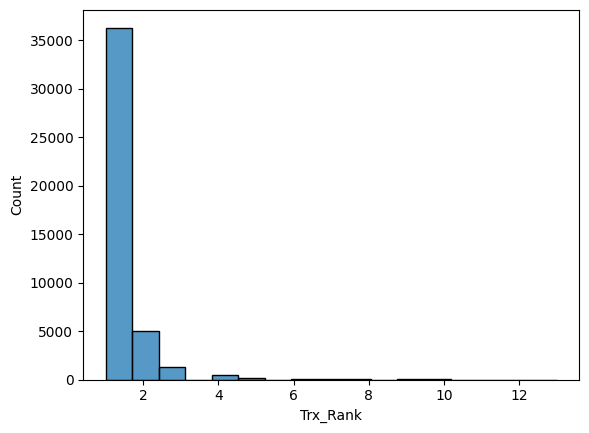

In [28]:
sns.histplot(data['Trx_Rank'])

<Axes: xlabel='Trx_Age', ylabel='Count'>

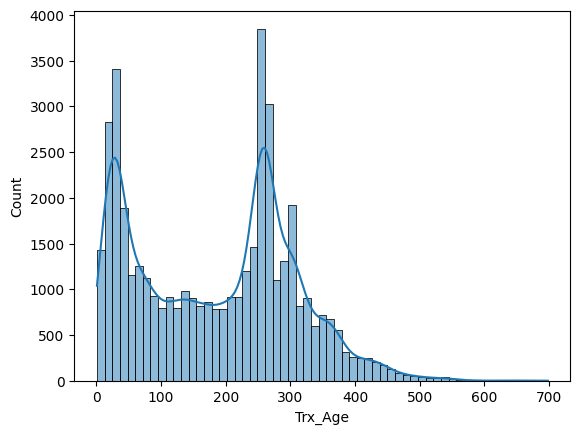

In [29]:
sns.histplot(data['Trx_Age'], kde=True)

### What is the total transaction volume for each category?

In [30]:
category_trx_volume = data.groupby('Category In English')['Trx_Vlu'].sum().reset_index()
fig1 = px.bar(category_trx_volume, x='Category In English', y='Trx_Vlu', title='Total Transaction Volume by Category')
fig1.show()

### What is the average  transaction volum for each category?

In [31]:
category_trx_volume_av = data.groupby('Category In English')['Trx_Vlu'].mean().reset_index()
fig2 = px.bar(category_trx_volume_av, x='Category In English', y='Trx_Vlu', title='Average Transaction Volume by Category')
fig2.show()

### What is the average transaction age for each category?

In [32]:
category_avg_trx_age = data.groupby('Category In English')['Trx_Age'].mean().reset_index()
fig3 = px.bar(category_avg_trx_age, x='Category In English', y='Trx_Age', title='Average Transaction Age by Category')
fig3.show()

- on average electronics has more Trx_Vlu than Grocery but transactions made on grocery are more also avg trans age for gorcery is less   

- Grocery is most frequent category purchase with highest total transaction volume and thus low transaction age if compared with other categories

In [33]:
category_trx_volume = data.groupby('Category In English')['Trx_Rank'].count().reset_index()
fig4 = px.bar(category_trx_volume, x='Category In English', y='Trx_Rank', title='Average rank by Category')
fig4.show()

### What is the total transaction value for each merchant?

In [34]:
merchant_trx_value = data.groupby('Mer_Name')['Trx_Vlu'].sum().sort_values(ascending=False).reset_index().head(20)
fig5 = px.bar(merchant_trx_value, x='Mer_Name', y='Trx_Vlu', title='Total Transaction Value by Merchant')
fig5.show()

In [35]:
data[data['Mer_Name']=='Rajasthan Handicrafts'].groupby(['Category In English'])['Trx_Vlu'].mean().sort_values(ascending=False)

Category In English
Grocery    319.394198
Name: Trx_Vlu, dtype: float64

- this merchant is selling grocery with avg trans value above 75 percentile of data

### What is the distribution of transaction value, ranks and customer age for each category?

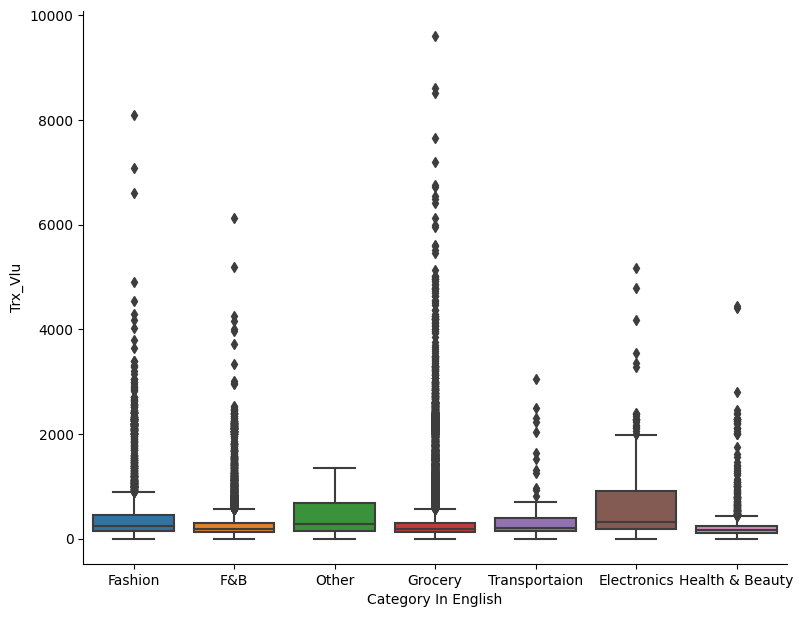

In [36]:
sns.catplot(x="Category In English", y="Trx_Vlu", kind="box", data=data, height=6.27, aspect=10.7/8.27)

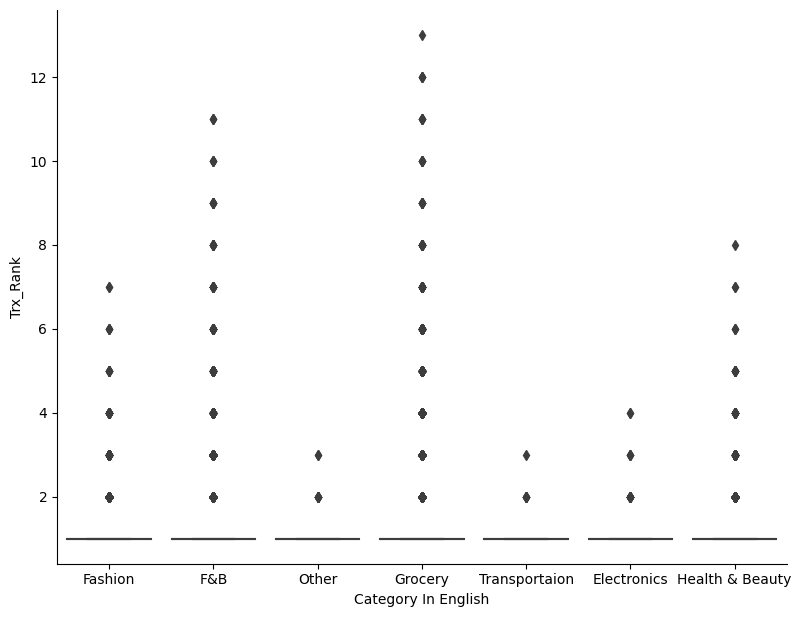

In [37]:
sns.catplot(x="Category In English", y="Trx_Rank", kind="box", data=data, height=6.27, aspect=10.7/8.27)

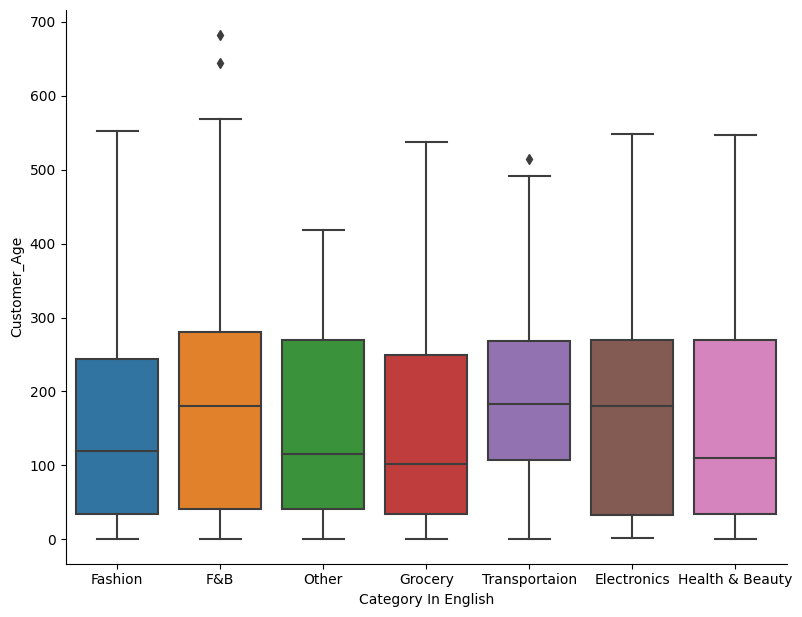

In [38]:
sns.catplot(x="Category In English", y="Customer_Age", kind="box", data=data, height=6.27, aspect=10.7/8.27)

### Who is the most frequent merchant for each category?

In [39]:
merchant_Category = data.groupby(['Category In English', 'Mer_Name'])['Trx_Rank'].count().sort_values(ascending=False).reset_index().rename(columns={'Trx_Rank':'frequency'})
merchant_Category.head(33)

Category In English                      Mer_Name  frequency
0              Grocery         Rajasthan Handicrafts      19303
1              Grocery             Saraswati Fabrics       6886
2              Grocery           Madurai Music Mania       4269
3                  F&B       Jai Hind General Stores       3384
4              Fashion          Agra Appliance Arena       2961
5      Health & Beauty         Indore Instrument Inn       1470
6                  F&B     Amritsar Auto Accessories       1302
7                  F&B          Gurgaon Gift Gallery       1012
8                  F&B            Mumbai Fashion Hub        907
9                  F&B        Pune Perfumes Paradise        553
10             Fashion       Faridabad Footwear Fair        311
11                 F&B           Varanasi Silk House        157
12       Transportaion              Krishna Textiles        146
13             Grocery             Ranchi Rug Retail        134
14         Electronics           Gwalior Garden Gear        130
15                 F&B      Jodhpur Jewelry Junction        104
16                 F&B           Nashik Noodle Niche         88
17                 F&B  Bhubaneswar Baker's Boutique         47
18                 F&B        Cuttack Curtain Corner         41
19                 F&B     Jamshedpur Jeans Junction         38
20             Fashion             Delhi Electronics         36
21                 F&B      Punjabi Furniture Palace         35
22             Grocery     Vadodara Vegetables Villa         31
23         Electronics             Thane Tea Traders         26
24         Electronics           Nagpur Novelty Nook         25
25         Electronics       Trichy Tailoring Trends         20
26                 F&B       Jaipur Pottery Emporium         19
27               Other           Ganpati Enterprises         16
28     Health & Beauty         Lucknow Leather World         14
29               Other     Kochi Kitchenware Kingdom         12
30               Other          Ahmedabad Sweet Mart         12
31                 F&B                Radha Emporium         11
32             Fashion     Kanpur Kitchen Appliances         10

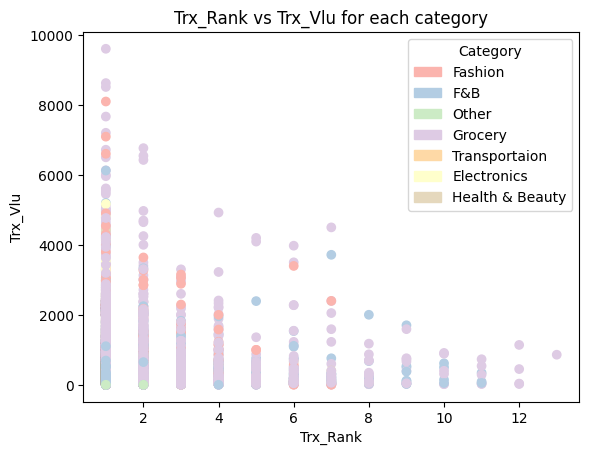

In [40]:
import matplotlib.patches
levels, categories = pd.factorize(data['Category In English'])
colors = [plt.cm.Pastel1(i) for i in levels] # using the "tab20" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.Pastel1(i), label=c) for i, c in enumerate(categories)]

plt.scatter(data['Trx_Rank'], data['Trx_Vlu'], c=colors)
plt.gca().set(xlabel='Trx_Rank', ylabel='Trx_Vlu', title='Trx_Rank vs Trx_Vlu for each category')
plt.legend(handles=handles, title='Category')

- fashion mostly high value, low rank

C:\Users\Acer\AppData\Local\Temp\ipykernel_26276\3894773369.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Trx_Rank', ylabel='Trx_Vlu'>

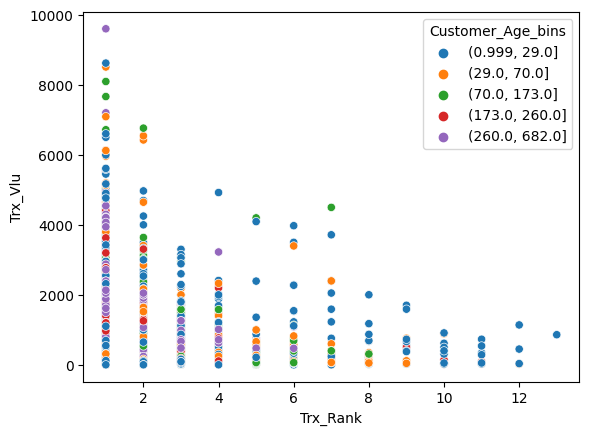

In [41]:
rank_vlu_age=data[['Trx_Rank','Trx_Vlu','Customer_Age']]
rank_vlu_age['Customer_Age_bins'] = pd.qcut(rank_vlu_age['Customer_Age'], 5)
sns.scatterplot(x= rank_vlu_age.Trx_Rank, y= rank_vlu_age.Trx_Vlu, hue= rank_vlu_age.Customer_Age_bins)

- high rank have low value and low age (more recent)
- low rank (low no. of trx) and low value tend to be old trx (purple) 

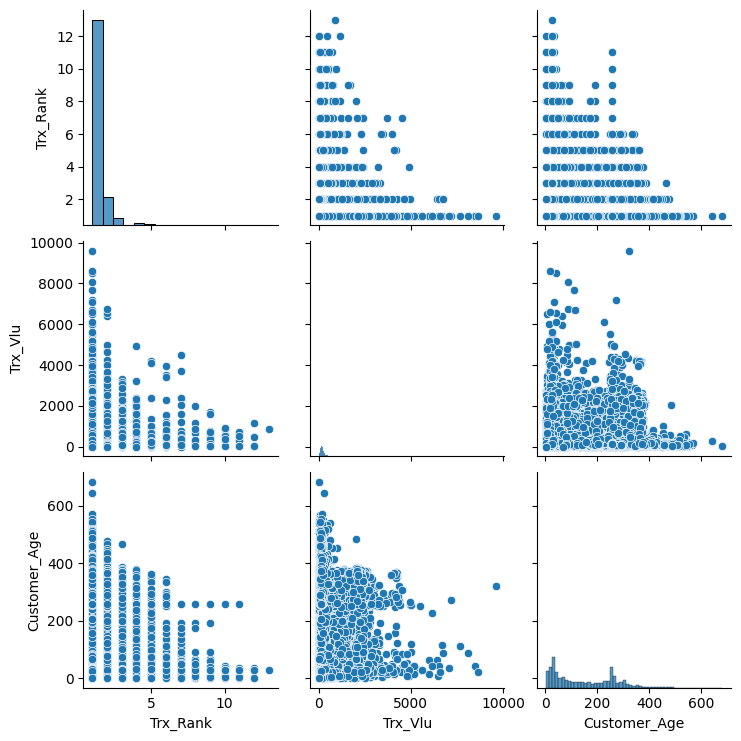

In [42]:
sns.pairplot(data[['Trx_Rank', 'Trx_Vlu', 'Customer_Age']])

- high rank trans has low Customer_Age and low Trx_Vlu

<Axes: >

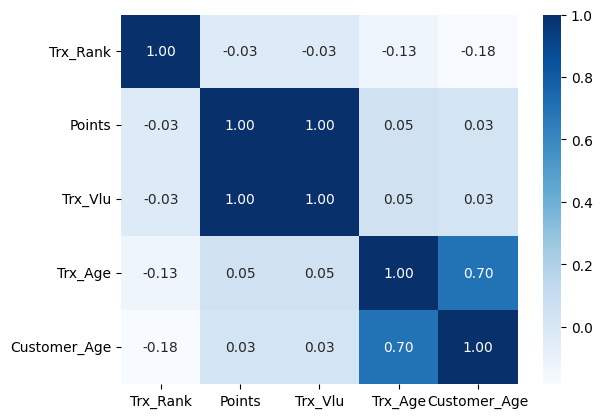

In [43]:
categorical_cols1 = data.select_dtypes(include='object').columns
numerical_col1 = data.select_dtypes(exclude = 'O').columns.drop(['User_Id'])
sns.heatmap(data[numerical_col1].corr(),annot=True,cmap='Blues', fmt='.2f')

- -ve corr bet age and rank (old trx high age are not frequent low rank)

## Clustering original data using K-means

In [44]:
x = data.drop(['Points', 'User_Id', 'Trx_Age'] , axis =1)

- 'Trx_Age' removed since it is corr with 'Customer_Age'
- 'Points' removed since it is corr with 'Trx_vlu'

In [45]:
x.columns

Index(['Trx_Rank', 'Trx_Vlu', 'Customer_Age', 'Category In English',
       'Mer_Name'],
      dtype='object')

In [46]:
categorical_cols = x.select_dtypes(include='object').columns
numerical_col = x.select_dtypes(exclude = 'O').columns

In [47]:
x.duplicated().sum()

2805

In [48]:
x.drop_duplicates(inplace = True)
x.reset_index(drop = True , inplace = True)

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , RobustScaler

In [50]:
preprocessor = ColumnTransformer(transformers=
    [('oe', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_cols), # One-Hot Encoding for any categorical variables with more than 2 categories
     ('num', RobustScaler(), numerical_col) # Robust Scaler for numerical data since there are outliers
     ])

In [51]:
x_preprocessed = preprocessor.fit_transform(x)

## Elbow Method

In [52]:
import warnings
warnings.filterwarnings("ignore")

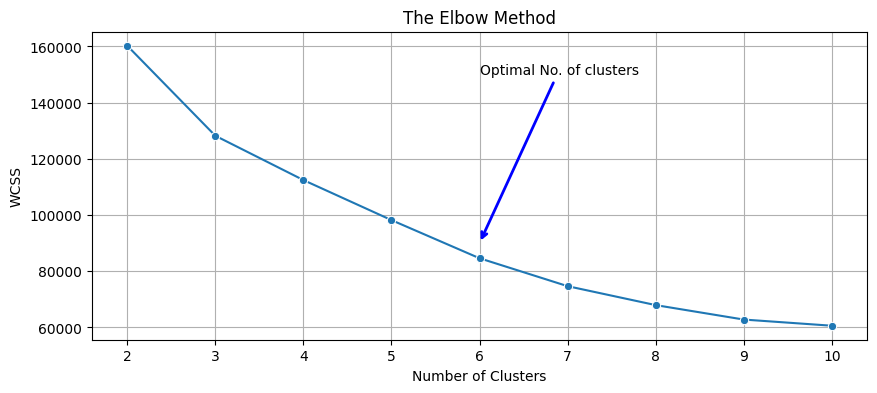

In [94]:
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(2,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(x_preprocessed)
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

#Visualizing the ELBOW method to get the optimal value of K 
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(x=range(2,11), y=wcss, marker='o', ax=ax)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

# Annotate arrow
ax.annotate('Optimal No. of clusters', xy=(6, 90000), xytext=(6, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

- From the above figure, last most significant slope occurs at k = 6 , hence assure n_clusters of 6 clusters in good choice.

# Silhouette Score for K-Means Clusters

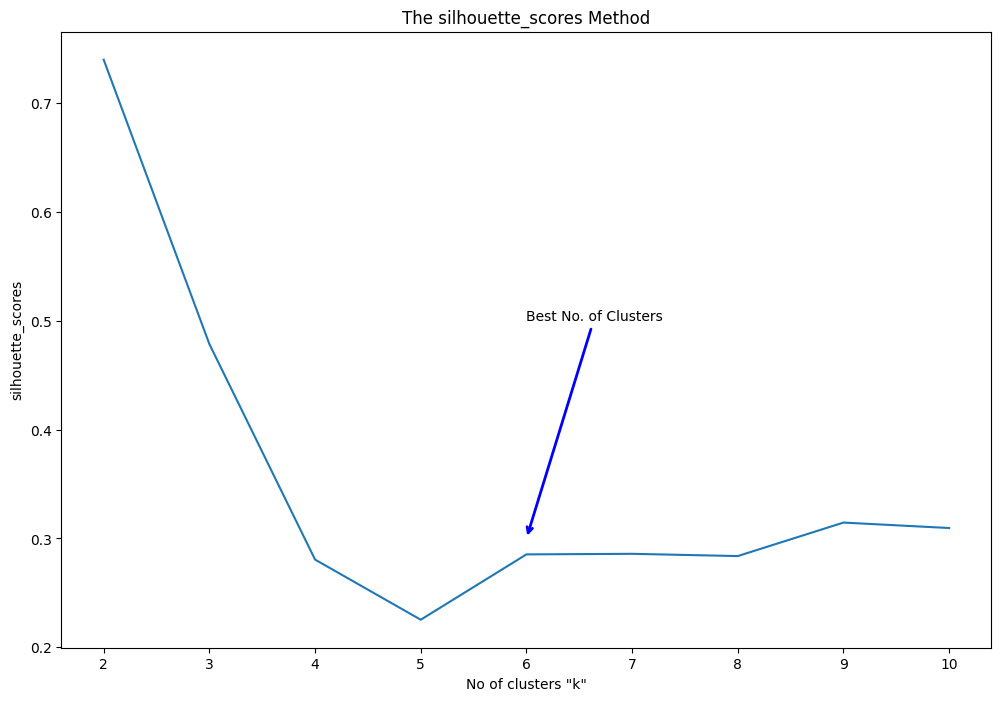

In [54]:
from sklearn.metrics import silhouette_score 
silhouette_scores=[]
k_range= range(2,11)

for i in k_range:
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x_preprocessed)
    silhouette_scores.append(silhouette_score(x_preprocessed,  kmeans.labels_))

#Visualizing the silhouette_scores method to get the optimal value of K 
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=k_range, y=silhouette_scores, ax=ax)
plt.title('The silhouette_scores Method')
plt.xlabel('No of clusters "k"')
plt.ylabel('silhouette_scores')

# Annotate arrow
ax.annotate('Best No. of Clusters', xy=(6, 0.3), xytext=(6, 0.50), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))


plt.show()

In [95]:
km4 = KMeans(n_clusters= 4, init='k-means++', random_state=0, n_init='auto')
y_pred = km4.fit_predict(x_preprocessed)

In [96]:
km4.inertia_

114241.36841431343

In [97]:
x['cluster']=y_pred

In [98]:
x.shape

(40774, 6)

In [99]:
x.head(5)

Trx_Rank  Trx_Vlu  Customer_Age Category In English         Mer_Name  \
0         1   2014.0           362             Fashion  Shankar Traders   
1         1   1120.0           368             Fashion  Shankar Traders   
2         2    850.0           368             Fashion  Shankar Traders   
3         1    198.0            34             Fashion  Shankar Traders   
4         1    240.0           413             Fashion  Shankar Traders   

   cluster  
0        1  
1        3  
2        3  
3        0  
4        0

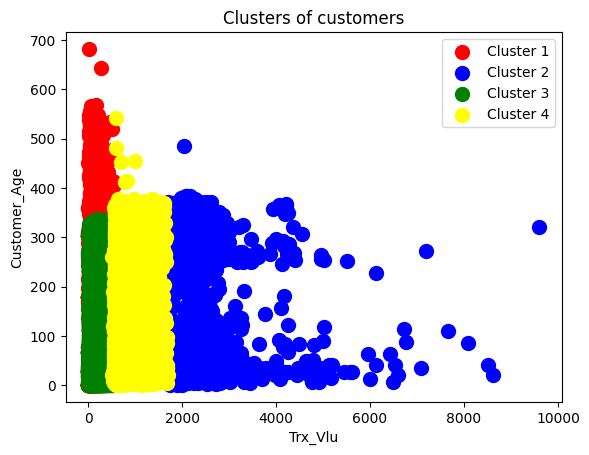

In [103]:
plt.scatter(x[y_pred == 0]['Trx_Vlu'], x[y_pred == 0]['Customer_Age'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_pred == 1]['Trx_Vlu'], x[y_pred == 1]['Customer_Age'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_pred == 2]['Trx_Vlu'], x[y_pred == 2]['Customer_Age'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_pred == 3]['Trx_Vlu'], x[y_pred == 3]['Customer_Age'], s = 100, c = 'yellow', label = 'Cluster 4')
#plt.scatter(x[y_pred == 4]['Trx_Vlu'], x[y_pred == 4]['Customer_Age'], s = 100, c = 'brown', label = 'Cluster 5')
#plt.scatter(x[y_pred == 5]['Trx_Vlu'], x[y_pred == 5]['Customer_Age'], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Trx_Vlu')
plt.ylabel('Customer_Age')
plt.legend()
plt.show()

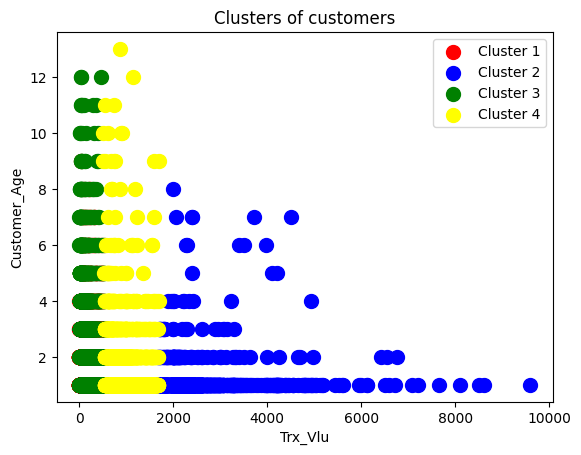

In [101]:
plt.scatter(x[y_pred == 0]['Trx_Vlu'], x[y_pred == 0]['Trx_Rank'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_pred == 1]['Trx_Vlu'], x[y_pred == 1]['Trx_Rank'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_pred == 2]['Trx_Vlu'], x[y_pred == 2]['Trx_Rank'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_pred == 3]['Trx_Vlu'], x[y_pred == 3]['Trx_Rank'], s = 100, c = 'yellow', label = 'Cluster 4')
#plt.scatter(x[y_pred == 4]['Trx_Vlu'], x[y_pred == 4]['Trx_Rank'], s = 100, c = 'brown', label = 'Cluster 5')
#plt.scatter(x[y_pred == 5]['Trx_Vlu'], x[y_pred == 5]['Trx_Rank'], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Trx_Vlu')
plt.ylabel('Customer_Age')
plt.legend()
plt.show()

<Axes: xlabel='Category In English', ylabel='Trx_Rank'>

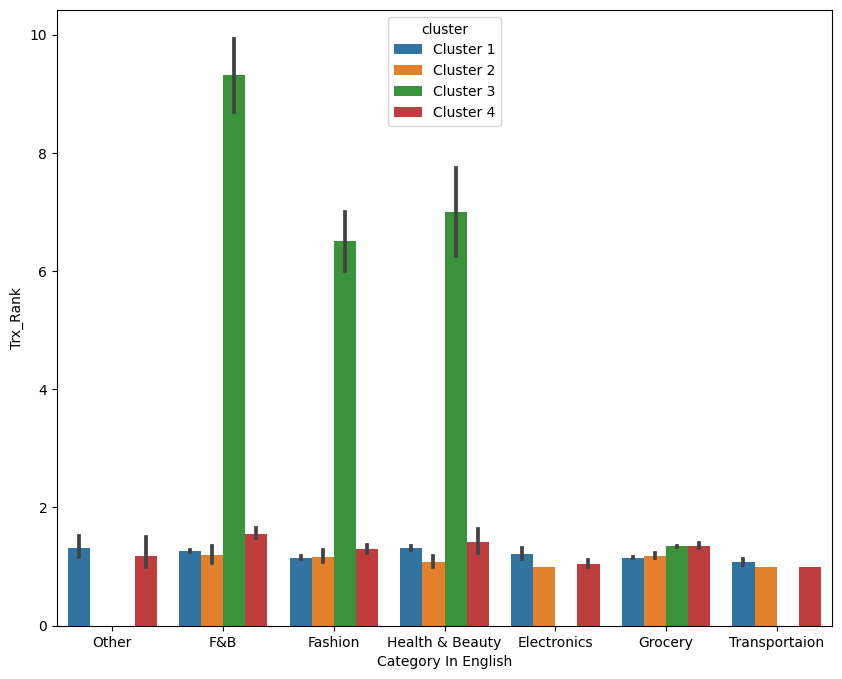

In [102]:
cat_rank_cluster=x[['Category In English','Trx_Rank','cluster']].reset_index().sort_values('cluster')
cat_rank_cluster['cluster']=cat_rank_cluster['cluster'].map({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5', 5: 'Cluster 6'})
plt.figure(figsize = (10 , 8))
sns.barplot(x='Category In English',
           y='Trx_Rank',
           hue='cluster',
           data=cat_rank_cluster)

## RFM analysis

In [63]:
data['User_Id'].nunique()

33446

In [64]:
rfm_table = data.groupby('User_Id').agg({
    'Customer_Age': lambda x: x.min(), # when was last time customer made trans
    'Trx_Rank': lambda x: len(x), # how many times customer made trans from all merchants
    'Trx_Vlu': lambda x: sum(x)   # how much did he spend in all trans from all merchants
}).reset_index()

rfm_table.rename(columns={'Customer_Age':'Recency' , 'Trx_Rank':'Frequency' , 'Trx_Vlu':'Monetary'}, inplace=True)

rfm_table

User_Id  Recency  Frequency  Monetary
0            0      281          1     442.7
1            1       34          1     249.0
2            2      236          1     300.0
3            3      320          1     162.0
4            4      407          1      70.0
...        ...      ...        ...       ...
33441    33514      101          3     594.0
33442    33515      244          1      48.0
33443    33516      256          1     132.0
33444    33517       13          1     210.0
33445    33518       55          3     568.0

[33446 rows x 4 columns]

In [65]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33446 entries, 0 to 33445
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   User_Id    33446 non-null  int64  
 1   Recency    33446 non-null  int64  
 2   Frequency  33446 non-null  int64  
 3   Monetary   33446 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.0 MB


In [66]:
rfm_table.isnull().sum()

User_Id      0
Recency      0
Frequency    0
Monetary     0
dtype: int64

In [67]:
rfm_table.describe().T

count          mean          std  min      25%      50%  \
User_Id    33446.0  16751.468576  9677.381221  0.0  8372.25  16742.5   
Recency    33446.0    160.533726   115.674263  1.0    41.00    154.0   
Frequency  33446.0      1.302966     0.833429  1.0     1.00      1.0   
Monetary   33446.0    417.769213   725.294270  2.0   150.00    216.0   

                 75%      max  
User_Id    25122.750  33518.0  
Recency      259.000    682.0  
Frequency      1.000     19.0  
Monetary     363.775  24088.2

In [68]:
px.scatter(rfm_table, log_y=True ,  x='Recency', y='Monetary', title='Recency vs Monetary')

 - some old trans have low value compared to most recent trans

In [69]:
px.scatter(rfm_table, log_y=True ,  x='Frequency', y='Monetary', title='Frequency vs Monetary')

- high frequnt trans have high value

In [70]:
# Create the 'r_score' column using qcut with custom labels based on 'Recency_numeric'
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'], 4, labels=['4', '3', '2', '1']) 
# the highest the number the lower its score as it is not recent

# Create the 'm_score' column using qcut with custom labels
rfm_table['f_score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 4, labels=['1', '2', '3', '4'])

# Create the 'm_score' column using qcut with custom labels
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], 4, labels=['1', '2', '3', '4'])

In [71]:
rfm_table.head()

User_Id  Recency  Frequency  Monetary r_score f_score m_score
0        0      281          1     442.7       1       1       4
1        1       34          1     249.0       4       1       3
2        2      236          1     300.0       2       1       3
3        3      320          1     162.0       1       1       2
4        4      407          1      70.0       1       1       1

- first customer has high score only in Monetary as he spent above average (216.0) but only made one visit from 281 days

In [72]:
rfm_table['rfm_score'] = 100 * rfm_table['r_score'].astype(int) + 10 * rfm_table['f_score'].astype(int) + rfm_table['m_score'].astype(int)
rfm_table.head()

User_Id  Recency  Frequency  Monetary r_score f_score m_score  rfm_score
0        0      281          1     442.7       1       1       4        114
1        1       34          1     249.0       4       1       3        413
2        2      236          1     300.0       2       1       3        213
3        3      320          1     162.0       1       1       2        112
4        4      407          1      70.0       1       1       1        111

In [73]:
#rfm_table['rf_score'] = rfm_table['r_score'].astype(str) + rfm_table['f_score'].astype(str)
#rfm_table['rf_score']=pd.to_numeric(rfm_table['rf_score'])
#rfm_table.head()

In [74]:
#rfm_table['frist_segment'] = pd.qcut(rfm_table['rf_score'],4,['bronze','silver','gold','platinum'])
#rfm_table.head()

In [75]:
#px.histogram(rfm_table, x='frist_segment', title='RFM Segments Count')

In [73]:
def customer_segmenation(rfm_score):
  if rfm_score == 444:
    return 'VIP customer'
  elif  rfm_score >= 433 and rfm_score < 444:
    return 'very Loyal customer'
  elif   rfm_score >=421 and rfm_score< 433:
    return 'become loyal customer'
  elif rfm_score>=344 and rfm_score < 421:
    return 'recent customer'
  elif rfm_score>=323 and rfm_score<344:
    return 'Potential customer'
  elif rfm_score>=224 and rfm_score<311:
    return 'high risk to churn'
  else:
    return 'Lossing customer'

In [74]:
rfm_table['customer_segmenation'] = rfm_table['rfm_score'].apply(customer_segmenation)
rfm_table

User_Id  Recency  Frequency  Monetary r_score f_score m_score  \
0            0      281          1     442.7       1       1       4   
1            1       34          1     249.0       4       1       3   
2            2      236          1     300.0       2       1       3   
3            3      320          1     162.0       1       1       2   
4            4      407          1      70.0       1       1       1   
...        ...      ...        ...       ...     ...     ...     ...   
33441    33514      101          3     594.0       3       4       4   
33442    33515      244          1      48.0       2       4       1   
33443    33516      256          1     132.0       2       4       1   
33444    33517       13          1     210.0       4       4       2   
33445    33518       55          3     568.0       3       4       4   

       rfm_score customer_segmenation  
0            114     Lossing customer  
1            413      recent customer  
2            213     Lossing customer  
3            112     Lossing customer  
4            111     Lossing customer  
...          ...                  ...  
33441        344      recent customer  
33442        241   high risk to churn  
33443        241   high risk to churn  
33444        442  very Loyal customer  
33445        344      recent customer  

[33446 rows x 9 columns]

In [75]:
segment_counts = rfm_table['customer_segmenation'].value_counts().reset_index()
px.bar(segment_counts, y='customer_segmenation', x='count', title='Customer Segmentation Count')

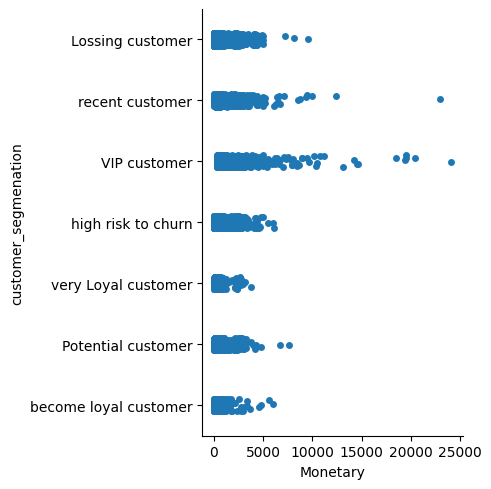

In [76]:
sns.catplot(x="Monetary", y="customer_segmenation", data=rfm_table)

In [77]:
rfm_table[['customer_segmenation','Recency','Frequency','Monetary']].groupby('customer_segmenation').agg(['mean','count','max']).round(2)

Recency             Frequency            Monetary  \
                         mean  count  max      mean  count max     mean   
customer_segmenation                                                      
Lossing customer       241.42  15840  682      1.06  15840   7   326.22   
Potential customer      93.71   3873  154      1.30   3873   7   358.35   
VIP customer            24.77   1732   41      2.88   1732  19  1245.03   
become loyal customer   23.69   2512   41      1.00   2512   1   271.33   
high risk to churn     221.66   3939  259      1.30   3939  13   456.62   
recent customer         47.59   3108  154      1.64   3108  11   646.53   
very Loyal customer     24.09   2442   41      1.68   2442  19   315.91   

                                       
                       count      max  
customer_segmenation                   
Lossing customer       15840   9600.0  
Potential customer      3873   7664.0  
VIP customer            1732  24088.2  
become loyal customer   2512   5998.0  
high risk to churn      3939   6128.0  
recent customer         3108  22922.8  
very Loyal customer     2442   3796.0

## Clustering using K-means

In [78]:
new_data = rfm_table[['r_score','f_score','m_score','rfm_score']]
new_data

r_score f_score m_score  rfm_score
0           1       1       4        114
1           4       1       3        413
2           2       1       3        213
3           1       1       2        112
4           1       1       1        111
...       ...     ...     ...        ...
33441       3       4       4        344
33442       2       4       1        241
33443       2       4       1        241
33444       4       4       2        442
33445       3       4       4        344

[33446 rows x 4 columns]

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = sc.fit_transform(new_data)

In [80]:
import warnings
warnings.filterwarnings("ignore")

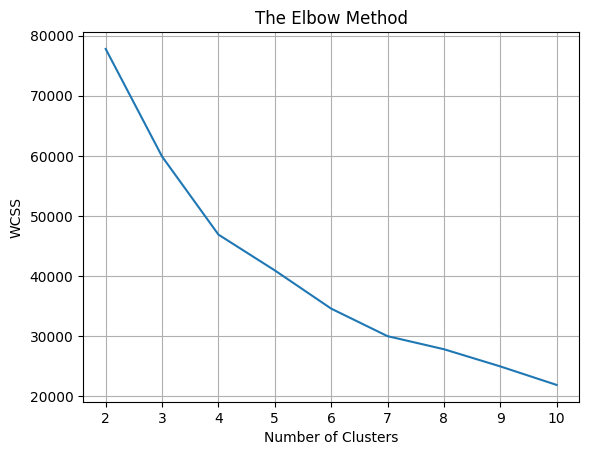

In [105]:
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(2,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters', marker='o')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

- From the above figure, last most significant slope occurs at k = 4, hence will have 4 clusters in this case.

In [106]:
km4 = KMeans(n_clusters= 4, init='k-means++', random_state=0, n_init='auto')
y_pred1 = km4.fit_predict(data_scaled)

In [107]:
km4.inertia_

47326.10228243712

In [108]:
new_data['cluster']=y_pred1

In [109]:
new_data.shape

(33446, 5)

In [110]:
new_data.head(5)

r_score f_score m_score  rfm_score  cluster
0       1       1       4        114        1
1       4       1       3        413        0
2       2       1       3        213        3
3       1       1       2        112        3
4       1       1       1        111        3

In [111]:
final_data_db1 = pd.concat([rfm_table,new_data['cluster']],axis=1)
final_data_db1

User_Id  Recency  Frequency  Monetary r_score f_score m_score  \
0            0      281          1     442.7       1       1       4   
1            1       34          1     249.0       4       1       3   
2            2      236          1     300.0       2       1       3   
3            3      320          1     162.0       1       1       2   
4            4      407          1      70.0       1       1       1   
...        ...      ...        ...       ...     ...     ...     ...   
33441    33514      101          3     594.0       3       4       4   
33442    33515      244          1      48.0       2       4       1   
33443    33516      256          1     132.0       2       4       1   
33444    33517       13          1     210.0       4       4       2   
33445    33518       55          3     568.0       3       4       4   

       rfm_score customer_segmenation  cluster  
0            114     Lossing customer        1  
1            413      recent customer        0  
2            213     Lossing customer        3  
3            112     Lossing customer        3  
4            111     Lossing customer        3  
...          ...                  ...      ...  
33441        344      recent customer        2  
33442        241   high risk to churn        1  
33443        241   high risk to churn        1  
33444        442  very Loyal customer        2  
33445        344      recent customer        2  

[33446 rows x 10 columns]

In [112]:
# Group by cluster and calculate mean values
final_data_db1['r_score']=pd.to_numeric(final_data_db1['r_score'])
final_data_db1['f_score']=pd.to_numeric(final_data_db1['f_score'])
final_data_db1['m_score']=pd.to_numeric(final_data_db1['m_score'])
cluster_summary = final_data_db1.groupby('cluster').agg({
    'r_score': 'mean',
    'f_score': 'mean',
    'm_score': 'mean'
}).reset_index()
print(cluster_summary)

   cluster   r_score   f_score   m_score
0        0  3.481601  1.698226  2.189949
1        1  1.513435  3.051974  3.008831
2        2  3.537452  3.601264  3.352576
3        3  1.513733  1.713092  1.502403


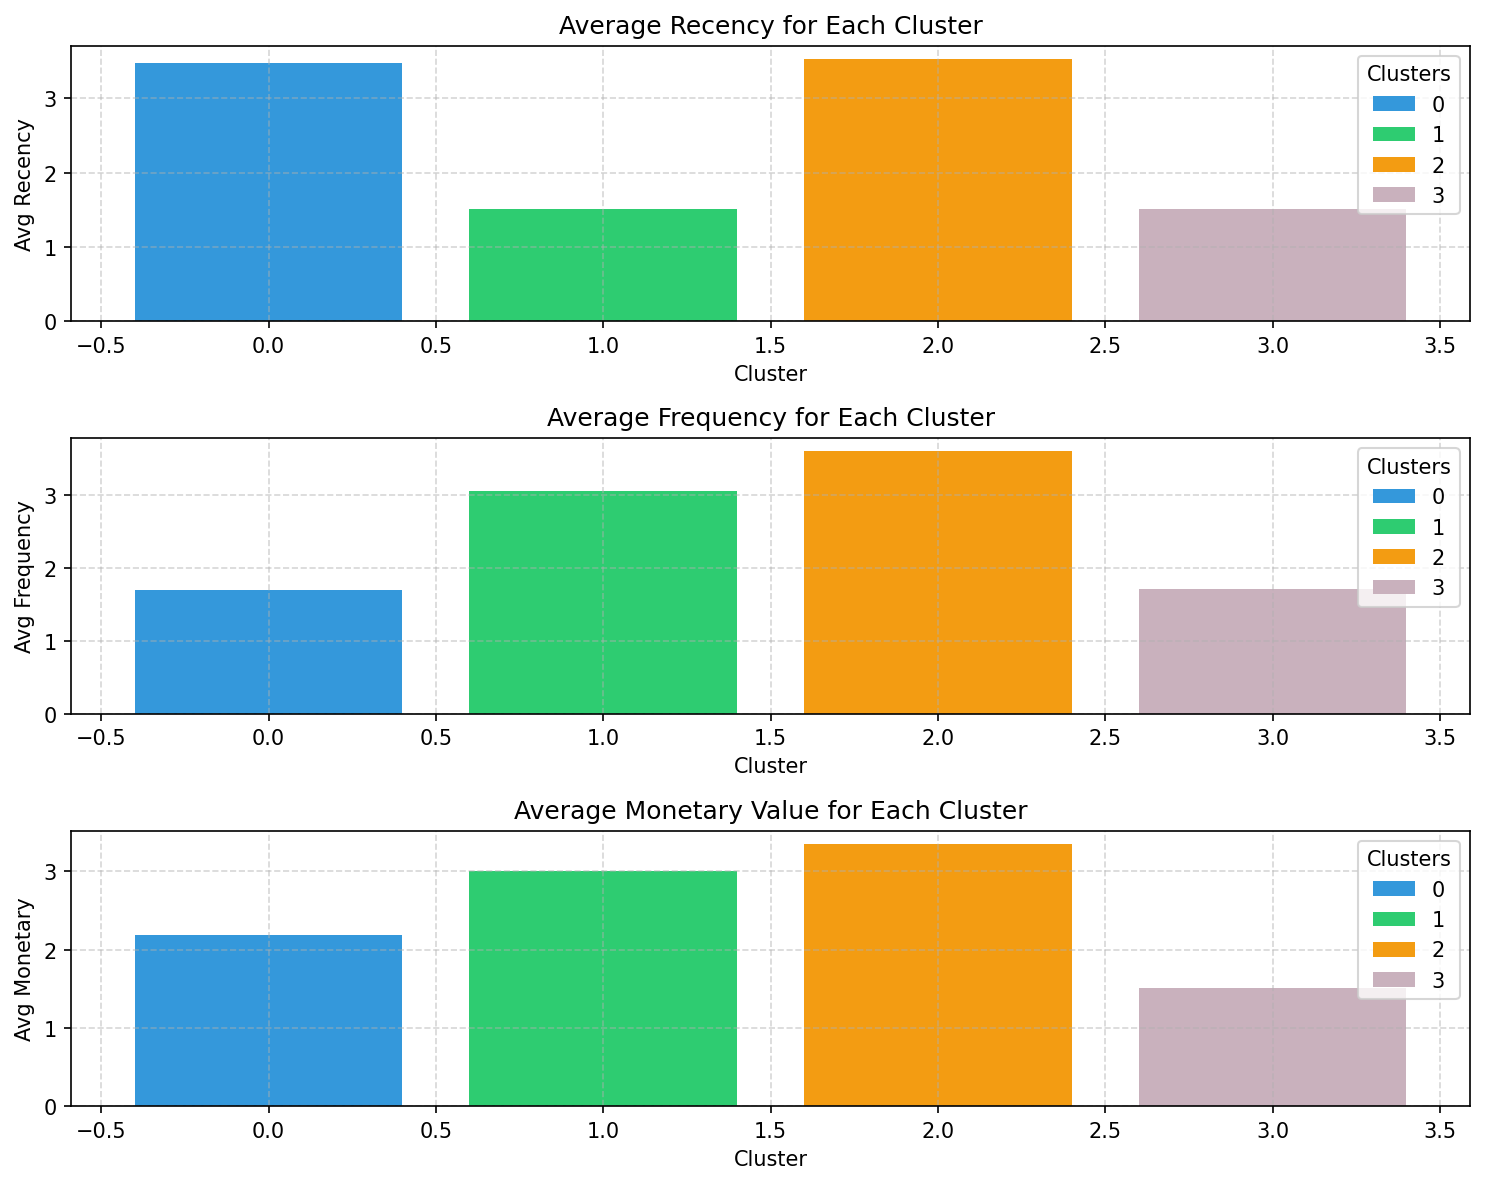

In [113]:
colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD','#F5DEB3','#A890F0']

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 8),dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['r_score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['f_score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['m_score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()

- Cluster 3: This cluster is characterized by low recency,  monetary and frequency. These customers still spend less and purchase less frequently than other clusters. These customers are lost ones.

- Cluster 2: Of all the four clusters, this cluster has the highest recency, frequency, and monetary values. Let’s call the customers in this cluster VIP customer (or power shoppers).

- Cluster 1: This cluster is characterized by high frequency and monetary but low recency. So these are lost good customers.

- Cluster 0: This cluster is characterized by high recency, monetary but low frequency. These customers are potential customer who are high spender and can potentially become long-term customers.

---- to delete:This cluster is characterized by high frequency , moderate recency but low monetary values. So these are high risk to churn.,This cluster is characterized by high recency and monetary,but low frequency. So these are loyal customer., This cluster is characterized by high monetary, moderate frequency but low recency, these are potential customers who can potentially become long-term customers.

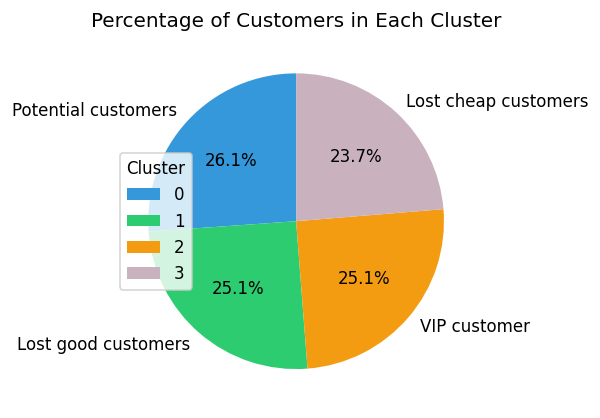

In [114]:
cluster_counts = final_data_db1['cluster'].value_counts()

colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']
# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['Potential customers', 'Lost good customers', 'VIP customer', 'Lost cheap customers']

# Create a pie chart
plt.figure(figsize=(4, 4),dpi=120)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
plt.legend(cluster_summary['cluster'], title='Cluster', loc='center left')

plt.show()

- quite an even distribution of customers across segments.

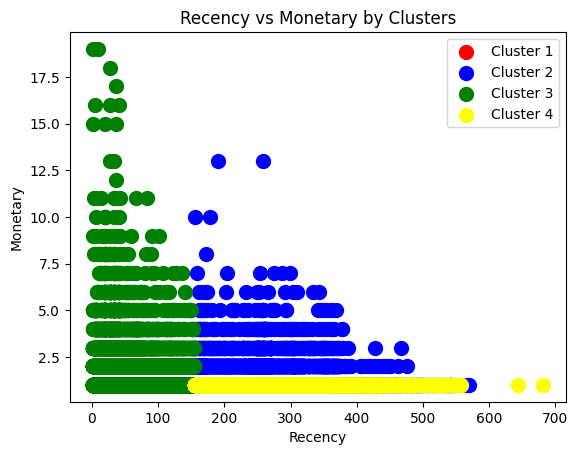

In [115]:
plt.scatter(final_data_db1[y_pred1 == 0]['Recency'], final_data_db1[y_pred1 == 0]['Frequency'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(final_data_db1[y_pred1 == 1]['Recency'], final_data_db1[y_pred1 == 1]['Frequency'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(final_data_db1[y_pred1 == 2]['Recency'], final_data_db1[y_pred1 == 2]['Frequency'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(final_data_db1[y_pred1 == 3]['Recency'], final_data_db1[y_pred1 == 3]['Frequency'], s = 100, c = 'yellow', label = 'Cluster 4')
#plt.scatter(final_data_db1[y_pred1 == 4]['Recency'], final_data_db1[y_pred1 == 4]['Frequency'], s = 100, c = 'brown', label = 'Cluster 5')
#plt.scatter(final_data_db1[y_pred1 == 4]['Recency'], final_data_db1[y_pred1 == 4]['Frequency'], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Recency vs Monetary by Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

## DBSCAN

In [116]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5,min_samples=4)
y_pred_db2 = db.fit_predict(data_scaled)

In [117]:
np.unique(y_pred_db2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=int64)

In [118]:
final_data_db2 = pd.concat([rfm_table,pd.DataFrame(y_pred_db2,columns=['cluster'])],axis=1)
final_data_db2

User_Id  Recency  Frequency  Monetary r_score f_score m_score  \
0            0      281          1     442.7       1       1       4   
1            1       34          1     249.0       4       1       3   
2            2      236          1     300.0       2       1       3   
3            3      320          1     162.0       1       1       2   
4            4      407          1      70.0       1       1       1   
...        ...      ...        ...       ...     ...     ...     ...   
33441    33514      101          3     594.0       3       4       4   
33442    33515      244          1      48.0       2       4       1   
33443    33516      256          1     132.0       2       4       1   
33444    33517       13          1     210.0       4       4       2   
33445    33518       55          3     568.0       3       4       4   

       rfm_score customer_segmenation  cluster  
0            114     Lossing customer        0  
1            413      recent customer        1  
2            213     Lossing customer        2  
3            112     Lossing customer        3  
4            111     Lossing customer        4  
...          ...                  ...      ...  
33441        344      recent customer        7  
33442        241   high risk to churn       23  
33443        241   high risk to churn       23  
33444        442  very Loyal customer       19  
33445        344      recent customer        7  

[33446 rows x 10 columns]

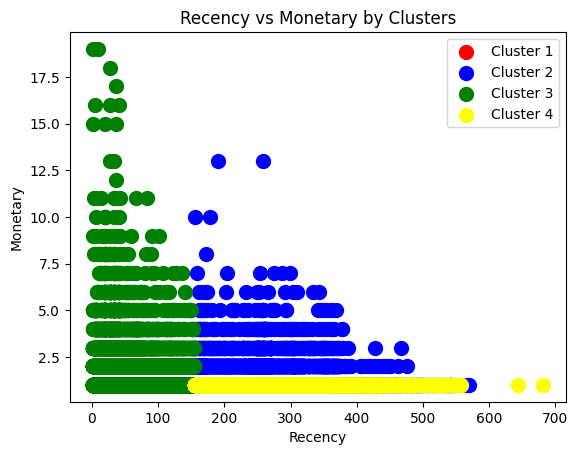

In [126]:
plt.scatter(final_data_db2[y_pred1 == 0]['Recency'], final_data_db2[y_pred1 == 0]['Frequency'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(final_data_db2[y_pred1 == 1]['Recency'], final_data_db2[y_pred1 == 1]['Frequency'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(final_data_db2[y_pred1 == 2]['Recency'], final_data_db2[y_pred1 == 2]['Frequency'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(final_data_db2[y_pred1 == 3]['Recency'], final_data_db2[y_pred1 == 3]['Frequency'], s = 100, c = 'yellow', label = 'Cluster 4')
#plt.scatter(final_data_db2[y_pred1 == 4]['Recency'], final_data_db2[y_pred1 == 4]['Frequency'], s = 100, c = 'brown', label = 'Cluster 5')
#plt.scatter(new_data[y_pred1 == 5]['Recency'], np.log(new_data[y_pred1 == 5]['Monetary']), s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Recency vs Monetary by Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

In [127]:
final_data_db2.groupby('cluster').describe().T

cluster                   0            1            2            3   \
User_Id   count   213.000000   570.000000   497.000000   622.000000   
          mean   5167.741784  4591.549123  4947.730382  4963.990354   
          std    2787.825939  2910.238337  2921.444707  2881.319974   
          min       0.000000     1.000000     2.000000     3.000000   
          25%    2841.000000  1988.500000  2452.000000  2507.250000   
          50%    5257.000000  4323.500000  4748.000000  4734.500000   
          75%    7518.000000  7075.500000  7568.000000  7577.750000   
          max    9880.000000  9868.000000  9892.000000  9875.000000   
Recency   count   213.000000   570.000000   497.000000   622.000000   
          mean    291.197183    23.407018   216.100604   303.725080   
          std      39.695642    11.183685    32.208274    42.027366   
          min     260.000000     1.000000   155.000000   260.000000   
          25%     269.000000    14.000000   189.000000   271.000000   
          50%     275.000000    24.000000   220.000000   295.000000   
          75%     298.000000    34.000000   246.000000   320.000000   
          max     541.000000    41.000000   259.000000   514.000000   
Frequency count   213.000000   570.000000   497.000000   622.000000   
          mean      1.000000     1.000000     1.000000     1.000000   
          std       0.000000     0.000000     0.000000     0.000000   
          min       1.000000     1.000000     1.000000     1.000000   
          25%       1.000000     1.000000     1.000000     1.000000   
          50%       1.000000     1.000000     1.000000     1.000000   
          75%       1.000000     1.000000     1.000000     1.000000   
          max       1.000000     1.000000     1.000000     1.000000   
Monetary  count   213.000000   570.000000   497.000000   622.000000   
          mean    868.178873   271.220175   273.761972   178.044051   
          std     709.835514    39.498153    40.634219    18.985917   
          min     364.000000   217.000000   217.200000   150.400000   
          25%     466.100000   239.000000   238.000000   160.850000   
          50%     587.700000   264.000000   266.100000   175.900000   
          75%     956.000000   298.950000   304.000000   194.000000   
          max    4300.000000   363.000000   360.100000   216.000000   
rfm_score count   213.000000   570.000000   497.000000   622.000000   
          mean    114.000000   413.000000   213.000000   112.000000   
          std       0.000000     0.000000     0.000000     0.000000   
          min     114.000000   413.000000   213.000000   112.000000   
          25%     114.000000   413.000000   213.000000   112.000000   
          50%     114.000000   413.000000   213.000000   112.000000   
          75%     114.000000   413.000000   213.000000   112.000000   
          max     114.000000   413.000000   213.000000   112.000000   

cluster                   4            5            6             7   \
User_Id   count   941.000000   530.000000   313.000000   1244.000000   
          mean   5120.827843  4903.666038  4875.923323  18815.823955   
          std    2787.084522  2783.647255  2948.947599   9981.064003   
          min       4.000000     5.000000     7.000000      8.000000   
          25%    2822.000000  2455.000000  2072.000000  10427.750000   
          50%    5199.000000  4920.500000  4922.000000  20203.500000   
          75%    7499.000000  7284.750000  7431.000000  27462.500000   
          max    9891.000000  9876.000000  9874.000000  33518.000000   
Recency   count   941.000000   530.000000   313.000000   1244.000000   
          mean    313.234857    23.639623   297.645367     83.930064   
          std      53.181695    10.550282    40.425606     30.530084   
          min     260.000000     1.000000   260.000000     42.000000   
          25%     273.000000    17.000000   269.000000     58.000000   
          50%     301.000000    25.500000   289.000000     77.000000   
        

### Merge cluster with original data

In [169]:
predict_data=pd.merge(data, final_data_db1[['User_Id','customer_segmenation','cluster']],  on="User_Id", how='left')
predict_data

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
0             1   20140   2014.0      362           362             Fashion   
1             1   11200   1120.0      371           368             Fashion   
2             2    8500    850.0      368           368             Fashion   
3             1    1980    198.0      558            34             Fashion   
4             1    2400    240.0      413           413             Fashion   
...         ...     ...      ...      ...           ...                 ...   
43574         1    3050    305.0       27            27                 F&B   
43575         1    3120    312.0       31            31                 F&B   
43576         1    1200    120.0       25            25                 F&B   
43577         1      20      2.0        2             2               Other   
43578         2      20      2.0        2             2               Other   

       User_Id                Mer_Name   customer_segmenation  cluster  
0        21053         Shankar Traders       Lossing customer        1  
1        26472         Shankar Traders       Lossing customer        1  
2        26472         Shankar Traders       Lossing customer        1  
3        27075         Shankar Traders           VIP customer        2  
4        27417         Shankar Traders       Lossing customer        1  
...        ...                     ...                    ...      ...  
43574    26865  Cuttack Curtain Corner           VIP customer        2  
43575    27128  Cuttack Curtain Corner    very Loyal customer        2  
43576    28814  Cuttack Curtain Corner  become loyal customer        0  
43577    29107    Rourkela Rice Retail    very Loyal customer        2  
43578    29107    Rourkela Rice Retail    very Loyal customer        2  

[43579 rows x 10 columns]

In [207]:
predict_data.groupby('cluster')['User_Id'].count().reset_index()

cluster  User_Id
0        0     8397
1        1    10028
2        2    16416
3        3     8738

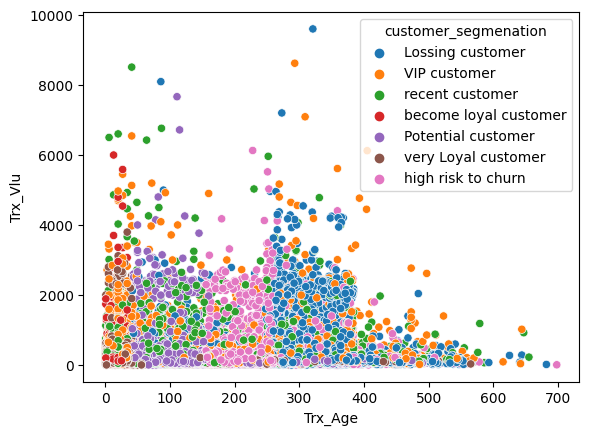

In [200]:
sns.scatterplot(y= predict_data.Trx_Vlu, x= predict_data.Trx_Age, hue= predict_data.customer_segmenation);

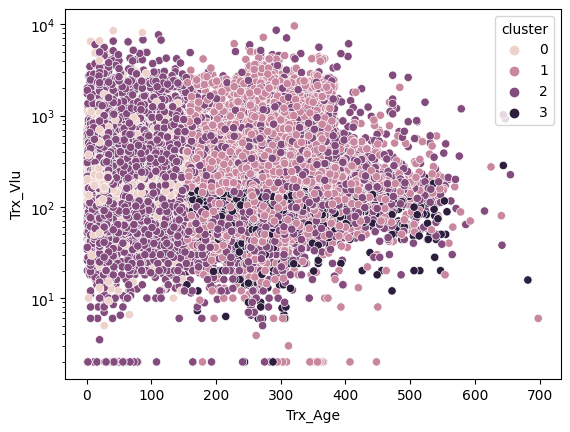

In [204]:
sns.scatterplot(x='Trx_Age',y='Trx_Vlu',data=predict_data, hue='cluster')
plt.yscale('log')

## Recomendation system

In [132]:
# Step 1: Identify the top 10 best-selling Mer_Name in each cluster based on the total Trx_Vlu
best_selling_mer = predict_data.groupby(['cluster','Mer_Name','Category In English'])['Trx_Vlu'].sum().reset_index()
best_selling_mer = best_selling_mer.sort_values(by=['cluster', 'Trx_Vlu'], ascending=[True, False])
top_mer_per_cluster = best_selling_mer.groupby('cluster').head(10)
top_mer_per_cluster

cluster                   Mer_Name Category In English    Trx_Vlu
24         0      Rajasthan Handicrafts             Grocery  1209537.6
26         0          Saraswati Fabrics             Grocery   205579.4
0          0       Agra Appliance Arena             Fashion   158867.3
17         0        Madurai Music Mania             Grocery   121299.1
12         0    Jai Hind General Stores                 F&B   101664.8
2          0  Amritsar Auto Accessories                 F&B    61929.0
11         0      Indore Instrument Inn     Health & Beauty    52998.1
7          0    Faridabad Footwear Fair             Fashion    48533.5
19         0         Mumbai Fashion Hub                 F&B    36151.4
21         0     Pune Perfumes Paradise                 F&B    20198.8
62         1      Rajasthan Handicrafts             Grocery  1648330.4
64         1          Saraswati Fabrics             Grocery   737430.6
55         1        Madurai Music Mania             Grocery   704449.9
31         1       Agra Appliance Arena             Fashion   533512.4
46         1    Jai Hind General Stores                 F&B   338368.2
56         1         Mumbai Fashion Hub                 F&B   222012.4
41         1       Gurgaon Gift Gallery                 F&B   176140.0
45         1      Indore Instrument Inn     Health & Beauty   117420.8
33         1  Amritsar Auto Accessories                 F&B    81973.1
60         1     Pune Perfumes Paradise                 F&B    69359.8
112        2      Rajasthan Handicrafts             Grocery  2843073.1
115        2          Saraswati Fabrics             Grocery   627158.6
100        2        Madurai Music Mania             Grocery   591460.1
73         2       Agra Appliance Arena             Fashion   501198.3
90         2    Jai Hind General Stores                 F&B   305968.5
102        2         Mumbai Fashion Hub                 F&B   153006.4
89         2      Indore Instrument Inn     Health & Beauty   142783.4
81         2    Faridabad Footwear Fair             Fashion   120626.5
74         2  Amritsar Auto Accessories                 F&B   109462.7
85         2       Gurgaon Gift Gallery                 F&B    59615.8
148        3      Rajasthan Handicrafts             Grocery   464325.1
150        3          Saraswati Fabrics             Grocery   309972.8
136        3    Jai Hind General Stores                 F&B   115291.8
142        3        Madurai Music Mania             Grocery    94736.0
124        3       Agra Appliance Arena             Fashion    86623.6
132        3       Gurgaon Gift Gallery                 F&B    51756.8
135        3      Indore Instrument Inn     Health & Beauty    42958.8
126        3  Amritsar Auto Accessories                 F&B    33715.6
144        3         Mumbai Fashion Hub                 F&B    22399.9
147        3     Pune Perfumes Paradise                 F&B    16703.2

In [133]:
# Step 2: Create a record of Mer_Name by each customer in each cluster
customer_mer = predict_data.groupby(['User_Id', 'cluster', 'Mer_Name','Category In English'])['Trx_Vlu'].sum().reset_index()
customer_mer

User_Id  cluster                   Mer_Name Category In English  \
0            0        1    Jai Hind General Stores                 F&B   
1            1        0       Agra Appliance Arena             Fashion   
2            2        3  Amritsar Auto Accessories                 F&B   
3            3        3       Agra Appliance Arena             Fashion   
4            4        3          Ranchi Rug Retail             Grocery   
...        ...      ...                        ...                 ...   
36331    33515        1       Gurgaon Gift Gallery                 F&B   
36332    33516        1        Madurai Music Mania             Grocery   
36333    33517        2        Madurai Music Mania             Grocery   
36334    33518        2      Rajasthan Handicrafts             Grocery   
36335    33518        2        Varanasi Silk House                 F&B   

       Trx_Vlu  
0        442.7  
1        249.0  
2        300.0  
3        162.0  
4         70.0  
...        ...  
36331     48.0  
36332    132.0  
36333    210.0  
36334    372.0  
36335    196.0  

[36336 rows x 5 columns]

In [134]:
# Step 3: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_mer_per_cluster['cluster'].unique():
    top_mer = top_mer_per_cluster[top_mer_per_cluster['cluster'] == cluster]
    customers_in_cluster = predict_data[predict_data['cluster'] == cluster]['User_Id']
    
    for customer in customers_in_cluster:
        # Identify mrechants already dealt with by the customer
        customer_dealt_mer = customer_mer[(customer_mer['User_Id'] == customer) & 
                                                         (customer_mer['cluster'] == cluster)]['Mer_Name'].tolist()
        
        # Find top 3 merchants in the best-selling list that the customer hasn't dealt with yet
        top_mer_no_trx = top_mer[~top_mer['Mer_Name'].isin(customer_dealt_mer)]
        top_3_mer_no_trx = top_mer_no_trx.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_mer_no_trx[['Mer_Name', 'Category In English']].values.flatten().tolist())


In [135]:
recommendations

[[1447,
  0,
  'Rajasthan Handicrafts',
  'Grocery',
  'Saraswati Fabrics',
  'Grocery',
  'Agra Appliance Arena',
  'Fashion'],
 [2709,
  0,
  'Rajasthan Handicrafts',
  'Grocery',
  'Saraswati Fabrics',
  'Grocery',
  'Agra Appliance Arena',
  'Fashion'],
 [7026,
  0,
  'Rajasthan Handicrafts',
  'Grocery',
  'Saraswati Fabrics',
  'Grocery',
  'Agra Appliance Arena',
  'Fashion'],
 [14734,
  0,
  'Rajasthan Handicrafts',
  'Grocery',
  'Saraswati Fabrics',
  'Grocery',
  'Agra Appliance Arena',
  'Fashion'],
 [10840,
  0,
  'Rajasthan Handicrafts',
  'Grocery',
  'Saraswati Fabrics',
  'Grocery',
  'Agra Appliance Arena',
  'Fashion'],
 [60,
  0,
  'Rajasthan Handicrafts',
  'Grocery',
  'Agra Appliance Arena',
  'Fashion',
  'Madurai Music Mania',
  'Grocery'],
 [97,
  0,
  'Rajasthan Handicrafts',
  'Grocery',
  'Agra Appliance Arena',
  'Fashion',
  'Madurai Music Mania',
  'Grocery'],
 [137,
  0,
  'Rajasthan Handicrafts',
  'Grocery',
  'Agra Appliance Arena',
  'Fashion',
  'M

In [183]:
# Step 4: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['User_Id', 'cluster', 'Rec1_Mer_Name', 'Rec1_Category', \
                                                 'Rec2_Mer_Name', 'Rec2_Category', 'Rec3_Mer_Name', 'Rec3_Category'])
customer_data_with_recommendations = pd.merge(predict_data,recommendations_df,on=['User_Id', 'cluster'], how='left')

In [206]:
customer_data_with_recommendations

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
0             1   20140   2014.0      362           362             Fashion   
1             1   11200   1120.0      371           368             Fashion   
2             2    8500    850.0      368           368             Fashion   
3             1    1980    198.0      558            34             Fashion   
4             1    2860    286.0      327            34             Fashion   
...         ...     ...      ...      ...           ...                 ...   
43574         1    1130    113.0       20            20                 F&B   
43575         1    3120    312.0       31            31                 F&B   
43576         1    1200    120.0       25            25                 F&B   
43577         1      20      2.0        2             2               Other   
43578         2      20      2.0        2             2               Other   

       User_Id                Mer_Name   customer_segmenation  cluster  \
0        21053         Shankar Traders       Lossing customer        1   
1        26472         Shankar Traders       Lossing customer        1   
2        26472         Shankar Traders       Lossing customer        1   
3        27075         Shankar Traders           VIP customer        2   
4        27075    Agra Appliance Arena           VIP customer        2   
...        ...                     ...                    ...      ...   
43574    20060  Cuttack Curtain Corner  become loyal customer        0   
43575    27128  Cuttack Curtain Corner    very Loyal customer        2   
43576    28814  Cuttack Curtain Corner  become loyal customer        0   
43577    29107    Rourkela Rice Retail    very Loyal customer        2   
43578    29107    Rourkela Rice Retail    very Loyal customer        2   

               Rec1_Mer_Name Rec1_Category      Rec2_Mer_Name Rec2_Category  \
0      Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
1      Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
2      Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
3      Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
4      Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
...                      ...           ...                ...           ...   
43574  Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
43575  Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
43576  Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
43577  Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
43578  Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   

              Rec3_Mer_Name Rec3_Category  
0       Madurai Music Mania       Grocery  
1       Madurai Music Mania       Grocery  
2       Madurai Music Mania       Grocery  
3       Madurai Music Mania       Grocery  
4       Madurai Music Mania       Grocery  
...                     ...           ...  
43574  Agra Appliance Arena       Fashion  
43575   Madurai Music Mania       Grocery  
43576  Agra Appliance Arena       Fashion  
43577   Madurai Music Mania       Grocery  
43578   Madurai Music Mania       Grocery  

[43579 rows x 16 columns]

In [194]:
customer_data_with_recommendations.duplicated().sum()

36434

In [195]:
customer_data_with_recommendations.drop_duplicates(inplace = True)
customer_data_with_recommendations.reset_index(drop = True , inplace = True)

In [196]:
customer_data_with_recommendations

Trx_Rank  Points  Trx_Vlu  Trx_Age  Customer_Age Category In English  \
0             1   20140   2014.0      362           362             Fashion   
1             1   11200   1120.0      371           368             Fashion   
2             2    8500    850.0      368           368             Fashion   
3             1    1980    198.0      558            34             Fashion   
4             1    2860    286.0      327            34             Fashion   
...         ...     ...      ...      ...           ...                 ...   
43574         1    1130    113.0       20            20                 F&B   
43575         1    3120    312.0       31            31                 F&B   
43576         1    1200    120.0       25            25                 F&B   
43577         1      20      2.0        2             2               Other   
43578         2      20      2.0        2             2               Other   

       User_Id                Mer_Name   customer_segmenation  cluster  \
0        21053         Shankar Traders       Lossing customer        1   
1        26472         Shankar Traders       Lossing customer        1   
2        26472         Shankar Traders       Lossing customer        1   
3        27075         Shankar Traders           VIP customer        2   
4        27075    Agra Appliance Arena           VIP customer        2   
...        ...                     ...                    ...      ...   
43574    20060  Cuttack Curtain Corner  become loyal customer        0   
43575    27128  Cuttack Curtain Corner    very Loyal customer        2   
43576    28814  Cuttack Curtain Corner  become loyal customer        0   
43577    29107    Rourkela Rice Retail    very Loyal customer        2   
43578    29107    Rourkela Rice Retail    very Loyal customer        2   

               Rec1_Mer_Name Rec1_Category      Rec2_Mer_Name Rec2_Category  \
0      Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
1      Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
2      Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
3      Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
4      Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
...                      ...           ...                ...           ...   
43574  Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
43575  Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
43576  Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
43577  Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   
43578  Rajasthan Handicrafts       Grocery  Saraswati Fabrics       Grocery   

              Rec3_Mer_Name Rec3_Category  
0       Madurai Music Mania       Grocery  
1       Madurai Music Mania       Grocery  
2       Madurai Music Mania       Grocery  
3       Madurai Music Mania       Grocery  
4       Madurai Music Mania       Grocery  
...                     ...           ...  
43574  Agra Appliance Arena       Fashion  
43575   Madurai Music Mania       Grocery  
43576  Agra Appliance Arena       Fashion  
43577   Madurai Music Mania       Grocery  
43578   Madurai Music Mania       Grocery  

[43579 rows x 16 columns]

In [197]:
customer_data_with_recommendations.columns

Index(['Trx_Rank', 'Points', 'Trx_Vlu', 'Trx_Age', 'Customer_Age',
       'Category In English', 'User_Id', 'Mer_Name', 'customer_segmenation',
       'cluster', 'Rec1_Mer_Name', 'Rec1_Category', 'Rec2_Mer_Name',
       'Rec2_Category', 'Rec3_Mer_Name', 'Rec3_Category'],
      dtype='object')

In [228]:
final_customer_data_with_recommendations=customer_data_with_recommendations[['User_Id',\
                                                                             'Rec1_Mer_Name', 'Rec1_Category', \
                                                                             'Rec2_Mer_Name','Rec2_Category', \
                                                                             'Rec3_Mer_Name', 'Rec3_Category']].copy()
final_customer_data_with_recommendations.drop_duplicates(inplace = True)
final_customer_data_with_recommendations.reset_index(drop = True , inplace = True)
final_customer_data_with_recommendations

User_Id          Rec1_Mer_Name Rec1_Category      Rec2_Mer_Name  \
0        21053  Rajasthan Handicrafts       Grocery  Saraswati Fabrics   
1        26472  Rajasthan Handicrafts       Grocery  Saraswati Fabrics   
2        27075  Rajasthan Handicrafts       Grocery  Saraswati Fabrics   
3        27417  Rajasthan Handicrafts       Grocery  Saraswati Fabrics   
4         1447  Rajasthan Handicrafts       Grocery  Saraswati Fabrics   
...        ...                    ...           ...                ...   
33441    19177  Rajasthan Handicrafts       Grocery  Saraswati Fabrics   
33442    20060  Rajasthan Handicrafts       Grocery  Saraswati Fabrics   
33443    27128  Rajasthan Handicrafts       Grocery  Saraswati Fabrics   
33444    28814  Rajasthan Handicrafts       Grocery  Saraswati Fabrics   
33445    29107  Rajasthan Handicrafts       Grocery  Saraswati Fabrics   

      Rec2_Category         Rec3_Mer_Name Rec3_Category  
0           Grocery   Madurai Music Mania       Grocery  
1           Grocery   Madurai Music Mania       Grocery  
2           Grocery   Madurai Music Mania       Grocery  
3           Grocery   Madurai Music Mania       Grocery  
4           Grocery  Agra Appliance Arena       Fashion  
...             ...                   ...           ...  
33441       Grocery  Agra Appliance Arena       Fashion  
33442       Grocery  Agra Appliance Arena       Fashion  
33443       Grocery   Madurai Music Mania       Grocery  
33444       Grocery  Agra Appliance Arena       Fashion  
33445       Grocery   Madurai Music Mania       Grocery  

[33446 rows x 7 columns]

In [290]:
final_customer_data_with_recommendations.to_csv('final_customer_data_with_recommendations.csv', index=False)

In [291]:
%%writefile streamlit_App.py

import streamlit as st
import pandas as pd

st.set_page_config(layout="wide")
st.cache_data

df= pd.read_csv('final_customer_data_with_recommendations.csv')

# Add a multiselect widget to select rows based on the index
customer= sorted(df.User_Id.unique())
selected_indices = st.multiselect('Select customer:', options=customer)

# Subset the dataframe with the selected indices
selected_rows = df.loc[df['User_Id'].isin(selected_indices)]

# Display the selected data
st.write('Selected customer:')
st.column_config.Column(width="large")
st.dataframe(selected_rows.drop('User_Id', axis =1), hide_index=True)

Overwriting streamlit_App.py


https://www.kaggle.com/code/younaniskander/rfm-and-clustering
- RFM Clustering
- Customer segmentation

https://www.youtube.com/watch?v=76J3gaVR_9c

https://www.kaggle.com/code/farzadnekouei/customer-segmentation-recommendation-system